#### Group Name：Pandas
#### Group member: 
+ HuaZhiwen 20462786  
+ Chen Xiaoqi 20465106   
+ Guo Yuju  20465769   
+ Gu Yinsong 20461321

# What makes a country happy?

## Abstract
People often get happiness from a variety of things. When you get high marks in exams, you will feel happy. When you find a job you love, you will be happy. When you travel with your family, you will also feel happy. So, depending on the situation, we get a variety of perceived happiness. What, then, is happiness at the national level?

People like to say I'm happy to live in this country. Behind this kind of national happiness is actually a comprehensive reflection of the country's political system, economy, military strength and social security system. In fact, back in 2012, the United Nations released the first global Happiness Index report, which compares the happiness levels of people in 156 countries and regions. While improving their international political status and military power, countries in the world are paying more and more attention to the promotion of "happiness", a soft culture.

So, by collecting data from the global Happiness Index report for 2015-2020, we analyzed this data to see how happy countries around the world are, and to find out what causes the differences in happiness.

## Introduction
The global Happiness Report was jointly released by the Earth Institute at Columbia University and the United Nations. The report has a very complex set of criteria covering nine areas: education, health, environment, management, time, cultural diversity and inclusion. In each major field, there are 3-4 sub-categories respectively, such as literacy, education, knowledge, values and so on in the field of education, with a total of 33 sub-categories.

The Happiness index and rankings use data from the Gallup World Poll, where scores are based on the answers to questions in the poll. The pollsters use the Cantril Ladder to rate their lives (10 at best, 0 at worst) in specific areas.

The criteria may vary slightly from year to year, but the core ranking factors remain the same, including GDP per capita, healthy life expectancy, generosity index and freedom. Therefore, in order to better and accurately compare the changes of the happiness index, our report is to analyze the core factors that affect the happiness index.

## Motivation
The year 2020 is a very special year. The world's economy and politics have been disrupted by the epidemic, and people are constantly anxious about their lives and health. Many people are wondering whether they have a happy year. I happened to read the news entitled "Daphne Bramham: Happiness in the Time of COVID? It's Possible", which talked about many people's understanding of Happiness and how the epidemic is also creating Happiness for people to another extent. The epidemic has made people more united and led to many acts of kindness. So we started thinking, where is the happiest country in the world? They wanted to explore the happiness levels of different regions.


## Method
We downloaded the data of the World Happiness Report from 2015 to 2020. Through comparison, we found that the table headings (indicators) of the data from each year were different, and the names and rankings of indicators were not consistent.

We manually filter keywords in CSV table, unify and sort the index names, and make a unified table head.

In addition, we found changes in the total number of countries (and why in the report) that were not reflected in historical happiness trends.
Tease out the variables you have every year: GDP per Capita, Healthy Life expectancy, Freedom to make life choice. These indicators will be the main part of our study. Finally, the tables are merged.

## How we start it : Data Processing
#### Following these index:
+  GDP per capita
+  healthy life expectancy
+ generosity index 
+ freedom. 

In [1]:
#Import related libraries and packages to set the diagram theme
import numpy as np
import pandas as pd
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express  as px 
from plotly.offline import init_notebook_mode,iplot,plot

from matplotlib.pyplot import MultipleLocator
init_notebook_mode(connected = True)
plt.style.use('seaborn')

In [2]:
# read dataset
df_2015 = pd.read_csv('./archive/2015.csv')[['year','Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
df_2016 = pd.read_csv('./archive/2016.csv')[['year','Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
df_2017 = pd.read_csv('./archive/2017.csv')[['year','Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
df_2018 = pd.read_csv('./archive/2018.csv')[['year','Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
df_2019 = pd.read_csv('./archive/2019.csv')[['year','Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
df_2020 = pd.read_csv('./archive/2020.csv')[['year','Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
# Add a new colunm named "year"
df_2015["year"] = str(2015)
df_2016["year"] = str(2016)
df_2017["year"] = str(2017)
df_2018["year"] = str(2018)
df_2019["year"] = str(2019)
df_2020["year"] = str(2020)
# merge data

df_all = df_2015.append([df_2016, df_2017, df_2018, df_2019 ,df_2020], sort = False)
df_all.loc[ : , ~df_all.columns.str.contains("^Unnamed")]
df_all.head()

year      Country          Region  Happiness Rank  Happiness Score  \
0  2015  Switzerland  Western Europe               1            7.587   
1  2015      Iceland  Western Europe               2            7.561   
2  2015      Denmark  Western Europe               3            7.527   
3  2015       Norway  Western Europe               4            7.522   
4  2015       Canada   North America               5            7.427   

   Economy (GDP per Capita)  Health (Life Expectancy)  Freedom  Generosity  
0                   1.39651                   0.94143  0.66557     0.29678  
1                   1.30232                   0.94784  0.62877     0.43630  
2                   1.32548                   0.87464  0.64938     0.34139  
3                   1.45900                   0.88521  0.66973     0.34699  
4                   1.32629                   0.90563  0.63297     0.45811

If we want to know which countries have the highest happiness index, we start by identifying the top 10 countries for each year between 2015 and 2020. 

## Did the happiest and unhappiest countries change much?

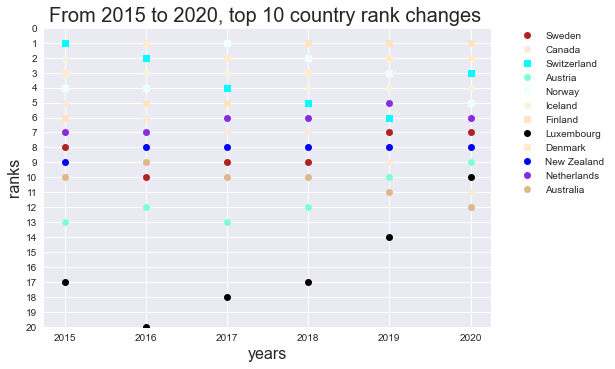

In [3]:
plt.xlabel('years',fontsize="16")
plt.ylabel('ranks',fontsize="16")
plt.title("From 2015 to 2020, top 10 country rank changes ",fontsize="20")
x = np.linspace(0, 2, 100)
all_top= pd.DataFrame()
top_country=dict()
country_list=[]
color=['firebrick'
       ,'antiquewhite'
       ,'aqua'
       ,'aquamarine'
       ,'azure'
       ,'beige'
       ,'bisque'
       ,'black'
       ,'blanchedalmond'
       ,'blue'
       ,'blueviolet'
       ,'burlywood'
       ,'brown'
       ,'cadetblue'
       ,'chartreuse'
       ,'chocolate'
       ,'coral'
       ,'cornflowerblue'
        ,'blue'
       ,'blueviolet'
       ,'burlywood'
       ,'brown'
       ,'cadetblue'
       ,'chartreuse'
       ,'chocolate'
       ,'coral'
       ,'cornflowerblue'
      ]
for i in np.arange(2015,2021):
    all=df_all[df_all['year']==str(i)].sort_values(by=['year','Happiness Rank'],ascending=[False,True])
    country_list+=[all.loc[j,'Country'] for j in  range(10)]
    #rank=df_all[(df_all['year']==str(i)) & (df_all['Country']==s.loc[j]['Country'])]
country_list = list(set(country_list))

for i in country_list:
    for j in np.arange(2015,2021):
        rank=df_all[(df_all['year']==str(j)) & (df_all['Country']==i)].iat[0,3]
        if i in top_country.keys():
            top_country[i].append(rank)
        else:
            top_country[i]=[rank]
year=[i for i in range(2015,2021)]
for i, key in enumerate(top_country):
    s=[20*0.5**n for n in top_country[key]]
    symbol='o' if sum(s)<18 else 's' 
    plt.plot(year,top_country[key],symbol,c=color[i], label=key)
plt.ylim(20,0)

ax=plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1))

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

From the chart, it can be seen that the top10 countries in happiness index from 2015 to 2020 are mostly stable and keep in the top10. Only Austria, Australia, Canada and Luxembourg have some changes. Australia dropped out of the top 10 in 2019 and 2020, and Canadaranked 11th in 2020. Conversely, Austria was in the top 10 starting in 2019 and Luxembourg was in the top 10 in 2020. Of course, it's obvious to observe that Finland has been number one for three consecutive years (2018-2020), making it the happiest country in the world.

In the same way, we can find out which countries are the least happy in the world.

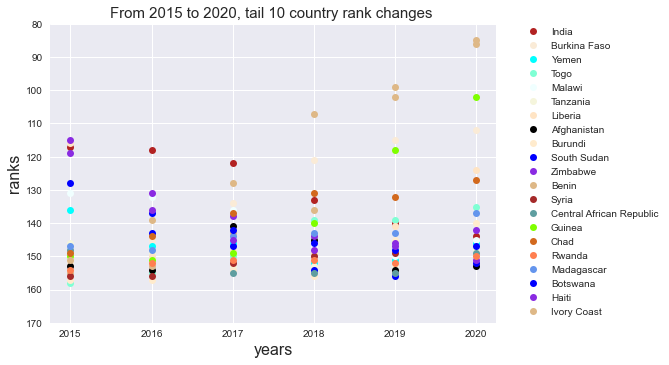

In [4]:
plt.xlabel('years',fontsize="16")
plt.ylabel('ranks',fontsize="16")
plt.title("From 2015 to 2020, tail 10 country rank changes ",fontsize="15")
x = np.linspace(0, 2, 100)
all_top= pd.DataFrame()
top_country=dict()
country_list=[]
color=['firebrick'
       ,'antiquewhite'
       ,'aqua'
       ,'aquamarine'
       ,'azure'
       ,'beige'
       ,'bisque'
       ,'black'
       ,'blanchedalmond'
       ,'blue'
       ,'blueviolet'
       ,'burlywood'
       ,'brown'
       ,'cadetblue'
       ,'chartreuse'
       ,'chocolate'
       ,'coral'
       ,'cornflowerblue'
        ,'blue'
       ,'blueviolet'
       ,'burlywood'
       ,'brown'
       ,'cadetblue'
       ,'chartreuse'
       ,'chocolate'
       ,'coral'
       ,'cornflowerblue'
      ]
for i in np.arange(2015,2021):
    all=df_all[df_all['year']==str(i)].sort_values(by=['year','Happiness Rank'],ascending=[False,False])
    #print(all.loc[156,'Country'] )
    country_list+=[all.loc[len(all)-j-1,'Country'] for j in  range(10)]
country_list = list(set(country_list))
country_list
for i in country_list:
    for j in np.arange(2015,2021):
        rank=df_all[(df_all['year']==str(j)) & (df_all['Country']==i)]
        if(rank.shape[0]==0):
            rank=999
        else:
             rank=rank.iat[0,3]
        if i in top_country.keys():
            top_country[i].append(rank)
        else:
            top_country[i]=[rank]
year=[i for i in range(2015,2021)]
for i, key in enumerate(top_country):
    s=[20*0.5**n for n in top_country[key]]
    symbol='o' if sum(s)<18 else 's' 
    plt.plot(year,top_country[key],symbol,c=color[i], label=key)

plt.ylim(170,80)
ax=plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(10))

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

The changes in the bottom ten countries will be slightly larger. A total of 20 countries have entered the bottom ten in the past six years. Through the observation, Ivory Coast's ranking in 2015-2020 has improved significantly, from 151 to around 85. But like South Sudan since 2018, it has remained in the last three.

In [5]:
def contrast(ls):
    df_con=pd.DataFrame({'Happiness Rank':[],'Country':[],'Happiness Score':[],'year':[]})
    for i in range(2015,2021):
        res_top=eval('df_'+str(i)).head(10)[ls]
        res_top['year']=[i for j in range(len(res_top))]
        res_tail=eval('df_'+str(i)).tail(10)[ls]
        res_tail['year']=[i for j in range(len(res_tail))]
        df_con=df_con.append([res_top,res_tail],ignore_index=True)
    return df_con
contrast(['Happiness Rank', 'Country', 'Happiness Score','Generosity'])

Happiness Rank                   Country  Happiness Score    year  \
0               1.0               Switzerland           7.5870  2015.0   
1               2.0                   Iceland           7.5610  2015.0   
2               3.0                   Denmark           7.5270  2015.0   
3               4.0                    Norway           7.5220  2015.0   
4               5.0                    Canada           7.4270  2015.0   
..              ...                       ...              ...     ...   
115           149.0  Central African Republic           3.4759  2020.0   
116           150.0                    Rwanda           3.3123  2020.0   
117           151.0                  Zimbabwe           3.2992  2020.0   
118           152.0               South Sudan           2.8166  2020.0   
119           153.0               Afghanistan           2.5669  2020.0   

     Generosity  
0      0.296780  
1      0.436300  
2      0.341390  
3      0.346990  
4      0.458110  
..          ...  
115    0.082410  
116    0.055484  
117   -0.072064  
118    0.016519  
119   -0.096429  

[120 rows x 5 columns]

In [6]:
# merge data
rank_top10 = df_2020.head(10)[['Happiness Rank', 'Country', 'Happiness Score']]
last_top10 = df_2020.tail(10)[['Happiness Rank', 'Country', 'Happiness Score']]
rank_concat = pd.concat([rank_top10, last_top10])

# 
fig = px.bar(contrast(['Happiness Rank', 'Country', 'Happiness Score','Generosity']), 
             x="Country", 
             y="Happiness Rank", 
             color="Happiness Score", 
             animation_frame="year",
             #animation_group="Happiness Rank",
             title="World's happiest and least happy countries")
fig.show()

##  What are the differences in the key factors that represent countries?

## Finland

Finland has ranked first in the global happiness index for three consecutive years. We used a heat map to analyze the reasons for its high score. 

In [7]:
df_Finland = df_all[df_all['Country'] == 'Finland']
df_Finland

year  Country          Region  Happiness Rank  Happiness Score  \
5  2015  Finland  Western Europe               6           7.4060   
4  2016  Finland  Western Europe               5           7.4130   
4  2017  Finland  Western Europe               5           7.4690   
0  2018  Finland  Western Europe               1           7.6320   
0  2019  Finland  Western Europe               1           7.7690   
0  2020  Finland  Western Europe               1           7.8087   

   Economy (GDP per Capita)  Health (Life Expectancy)   Freedom  Generosity  
5                  1.290250                  0.889110  0.641690    0.233510  
4                  1.405980                  0.810910  0.571040    0.254920  
4                  1.443572                  0.809158  0.617951    0.245483  
0                  1.305000                  0.874000  0.681000    0.202000  
0                  1.340000                  0.986000  0.596000    0.153000  
0                  1.285190                  0.961271  0.662317   -0.059482

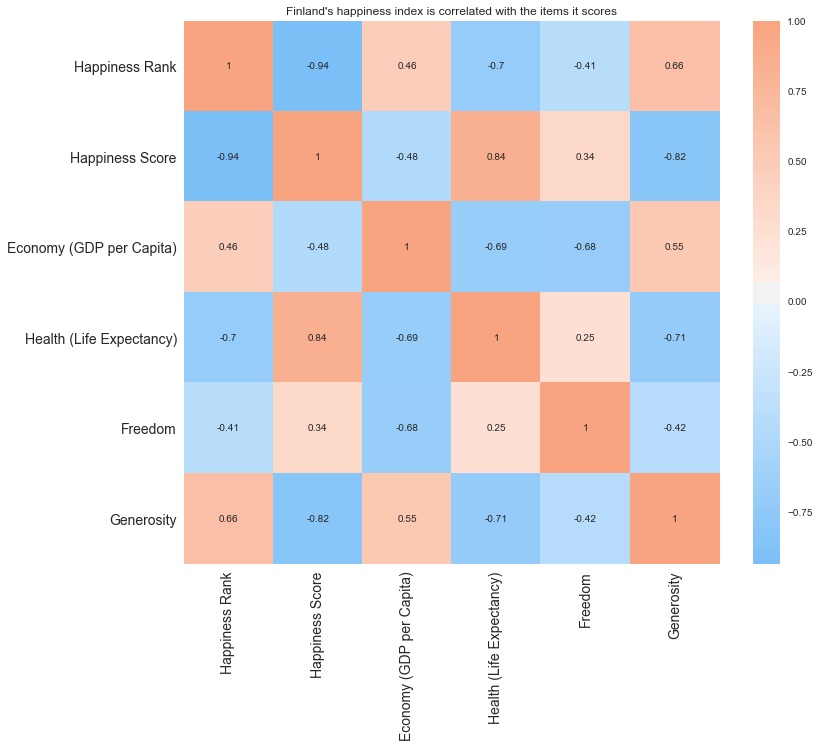

In [8]:
plt.figure(figsize=(12,10))
plt.title("Finland's happiness index is correlated with the items it scores")
sns.heatmap(df_Finland.corr(), annot=True,linecolor='white',cmap=sns.diverging_palette(240, 30, s=88, l=75, n=200))
plt.tick_params(labelsize=14)
plt.show()

Observing the heat map, we can find that their economy is actually not very developed,  even negatively correlated with the total score. But its health and total score have a very positive relationship (0.84). Therefore, Finland must be a country that is doing well in health. Although the economy may not be very strong, people get a high sense of happiness from medical and social security.

## Afghanistan

In [9]:
df_Afghanistan = df_all[df_all['Country'] == 'Afghanistan']
df_Afghanistan

year      Country         Region  Happiness Rank  Happiness Score  \
152  2015  Afghanistan  Southern Asia             153           3.5750   
153  2016  Afghanistan  Southern Asia             154           3.3600   
140  2017  Afghanistan  Southern Asia             141           3.7940   
144  2018  Afghanistan  Southern Asia             145           3.6320   
153  2019  Afghanistan  Southern Asia             154           3.2030   
152  2020  Afghanistan  Southern Asia             153           2.5669   

     Economy (GDP per Capita)  Health (Life Expectancy)  Freedom  Generosity  
152                  0.319820                  0.303350  0.23414    0.365100  
153                  0.382270                  0.173440  0.16430    0.312680  
140                  0.401477                  0.180747  0.10618    0.311871  
144                  0.332000                  0.255000  0.08500    0.191000  
153                  0.350000                  0.361000  0.00000    0.158000  
152                  0.300706                  0.266052  0.00000   -0.096429

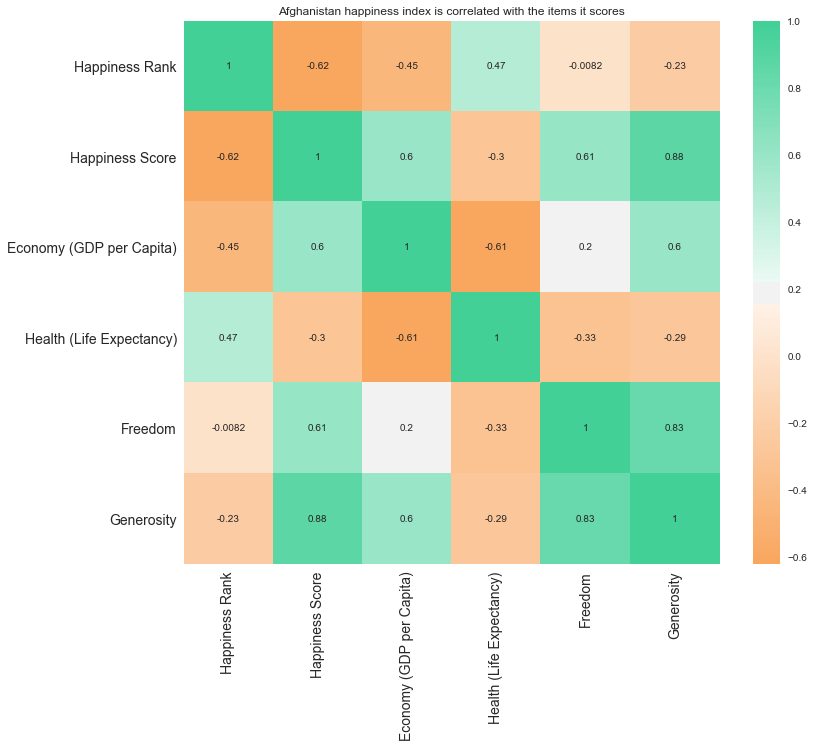

In [10]:
plt.figure(figsize=(12,10))
plt.title("Afghanistan happiness index is correlated with the items it scores")
sns.heatmap(df_Afghanistan.corr(), annot=True,linecolor='white',cmap=sns.diverging_palette(40, 150, s=88, l=75, n=200))
plt.tick_params(labelsize=14)
plt.show()

Afghanistan has always been a low-ranking country in the world ( the rank is always around the bottom in ten range), so it is necessary to analyze why its happiness index is low. It can be seen from the heat map that the main reason is concentrated on the health aspect, and the health and happiness scores are negatively correlated (-0.3), which also matches the reality of its constant wars.

# What are the key factors that affect happiness？

The scatter plot can well analyze the relationship between the two factors. 

In [11]:
# scatter diagram
fig = px.scatter(df_all, x='Economy (GDP per Capita)', 
                 y='Happiness Score',
                 color='year',
                 animation_frame="year",
                 trendline='ols'
                )
fig.update_layout(height=800, title_text='GDP per capita and Happiness Score')
fig.show()

Using scatter plots to analyze the relationship between GDP and happiness index, we found that no matter in 2015, 16, 17, 18, 19 or 20 years, GDP and happiness index were positively correlated, and So GDP must be one of the most important indicators of happiness. But how strong the correlation is, and what other factors are contributing to it, need to be compared with other factors.

So, we want to explore which factors have a greater impact on the total score of happiness index, so as to determine which factors are most likely to affect happiness. The heat map can fully show the relationship between scores and various factors.

## The ten most representative countries

We also selected 10 low-ranking countries to observe the changes in various factors each year.

In [12]:
#Calculate the ten with the largest variances
df_mean=pd.DataFrame({'country':[],'mean':[]})
for i in set(df_all['Country']):
    new=df_all[df_all['Country']==i].loc[::,['year','Country','Happiness Rank']]
    df_mean=df_mean.append(pd.DataFrame({'country':[i],'mean':new['Happiness Rank'].mean()}),ignore_index=True)
df_mean_max=df_mean.sort_values(by=['mean'],axis=0,ascending=[False]) [:10]
df_mean_max

country        mean
100                     Syria  152.600000
60   Central African Republic  152.400000
160                    Rwanda  151.666667
98                    Burundi  151.500000
53                South Sudan  150.400000
142                  Tanzania  150.333333
52                Afghanistan  150.000000
42                      Yemen  146.333333
89                       Togo  146.000000
66                 Madagascar  143.666667

In [13]:
def get_attr_country(pd_temp):
    df_con=pd.DataFrame({'year':[],'Country':[],'Region':[],'value':[],'type':[]})
    for index,key in enumerate(pd_temp.iloc[:,5:]):
        res=pd_temp.loc[:,['year','Country','Region',key]]
        res.columns=['year','Country','Region','value']
        res['type']=[key for i in range(len(pd_temp))]
        df_con=df_con.append(res,ignore_index=True)
    return df_con

In [14]:
df_country_temp=df_all[df_all['Country'].isin(df_mean_max['country'])]

In [15]:
fig=px.line(get_attr_country(df_country_temp), 
        x="year",
        y="value", 
        color="Country", 
        animation_frame="type",
        range_y=[0,0.8]
       )
fig.show()

From the graph we can see that the health index is very important, for some countries GDP is not very important.

## Differences in levels of happiness across continents
In addition to exploring the happiness rankings of specific countries, we can further observe the situation in each continent. The dynamic map of the earth can clearly show the degree of happiness among the continents, comparing which continents live in, the degree of happiness will be higher.

In [16]:
data = dict(type = 'choropleth', 
           locations = df_all['Country'],
           locationmode = 'country names',
           colorscale = 'RdYlGn',
           z = df_all['Happiness Score'], 
           text = df_all['Country'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Geographical Visualization of Happiness Score in world', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
choromap3.show()

According to the happiness index data, countries in North America contain the highest happiness index. Countries in South America and Oceania also feel very happy, indicating that life in these regions will be happier. On the contrary, in continents with more developed countries like Europe, their happiness index is not so high. This also shows from the side that GDP is not the only factor that determines the ranking.


In [17]:
fig = px.box(df_all,'Region', 'Happiness Score')
fig.show()

We further use the box chart to observe the range of fractions by continent. As we can see, Australia and New Zealand have the highest median, so countries in the Australia and New Zealand region tend to score higher and have a happier life in those places. North America and Western Europe, for example, also had relatively high median levels, suggesting they were also the happiest places. Notably, Western Europe's highest score is approaching eight, the highest of any region, meaning it has the world's highest happiness index.

##  HAVE THE CAUSES OF HAPPINESS CHANGED

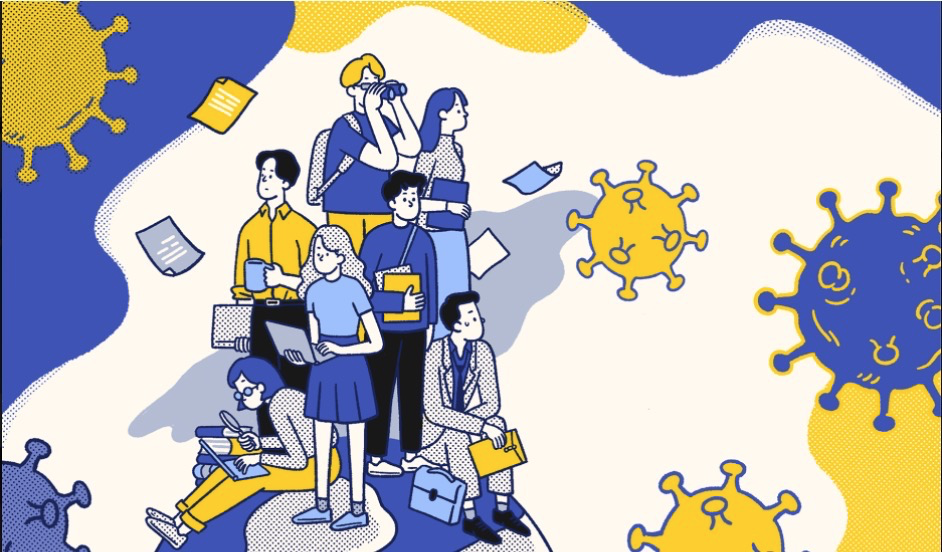

In [18]:
fig = px.box(df_all,'Region', 'Happiness Score',
             animation_group="year",
             animation_frame="year",
             color='year'
            )
fig.show()

## From 2019 to 2020.

In [19]:
data = dict(type = 'choropleth', 
           locations = df_2019['Country'],
           locationmode = 'country names',
           colorscale = 'RdYlGn',
           z = df_2019['Happiness Score'], 
           text = df_2019['Country'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Geographical Visualization of Happiness Score in 2019', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
choromap3.show()

In [20]:
data = dict(type = 'choropleth', 
           locations = df_2020['Country'],
           locationmode = 'country names',
           colorscale = 'RdYlGn',
           z = df_2020['Happiness Score'], 
           text = df_2020['Country'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Geographical Visualization of Happiness Score in 2020', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
choromap3.show()

Comparing the continents' happiness scores for 2019 and 2020, we can see that there is just a little change in this two years. Like some countries in Africa and Asia's scores relatively reduce.

## Has the key to happiness changed under the COVID-19
We want to explore which factors have a greater impact on the total score of happiness index, so as to determine which factors are most likely to affect happiness. The heat map can fully show the relationship between scores and various factors.


By observing the heat map made by the 2020 data, we can find that among the four main factors, the economy and health have a great impact on the total score (0.78 and 0.77 respectively), indicating that these two factors are easy to affect the total score. Score, and the degree of impact is similar.

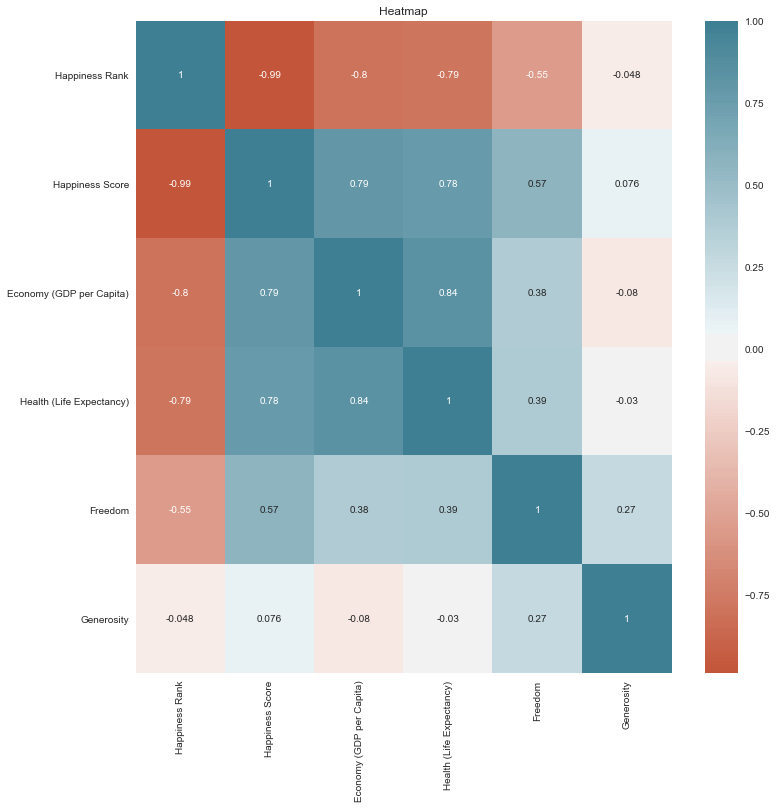

In [21]:
plt.figure(figsize=(12,12))
plt.title('Heatmap')
sns.heatmap(df_2019.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

Since 2020 is a very special year, the whole world is affected by the epidemic, so we also want to analyze the heat map of 2019 and combine the two images to explore whether the relationship between these key factors and happiness score is affected by the epidemic.

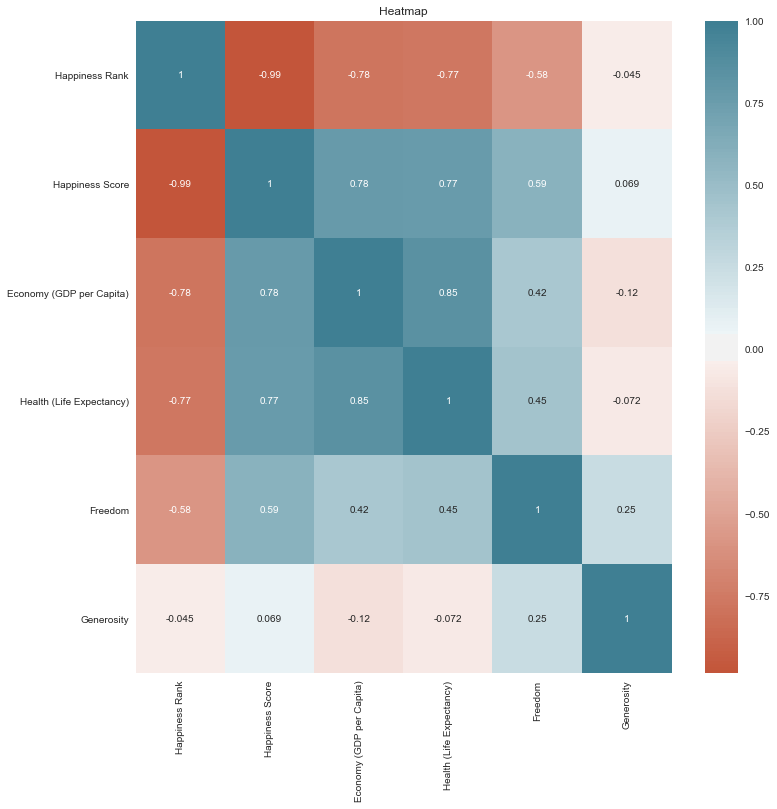

In [22]:
plt.figure(figsize=(12,12))
plt.title('Heatmap')
sns.heatmap(df_2020.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

As can be seen from the chart, the correlation between the economy and the total score in 2019 is 0.79, while it is 0.78 in 20 years. Health is also reduced by 0.1. According to the actual situation, it should be the epidemic that has led to a decline in the global economy, a decrease in gdp, and a decline in people's life expectancy, so the proportion of happiness index is reduced. On the contrary, under the epidemic, people are restrained and desire freedom, so the relationship between freedom and happiness index has increased.

In [23]:
fig = px.scatter(df_all, 
                 x='Economy (GDP per Capita)', 
                 y='Happiness Score',
                 animation_frame='year',
                 animation_group='Country',
                 size='Happiness Rank',
                 color='Country',
                 hover_name='Country',
                ) 
fig.update_layout(title_text='Happiness Rank vs GDP per Capita') 
fig.show()

In [24]:
fig = px.scatter(df_all, 
                 x='Health (Life Expectancy)', 
                 y='Happiness Score',
                 animation_frame='year',
                 animation_group='Country',
                 size='Happiness Rank',
                 color='Country',
                 hover_name='Country',
                ) 
fig.update_layout(title_text='Happiness Rank vs Health (Life Expectancy)') 
fig.show()

Through reflection on the epidemic, we consider the relationship between health factors and happiness index. This graph shows that health is also a very important factor

## Put ourself in the place: An exploration of Hong Kong's Happiness index

+ Has Hong Kong changed when it is still in danger?

In [25]:
df_HK = df_all[df_all['Country'] == 'Hong Kong']

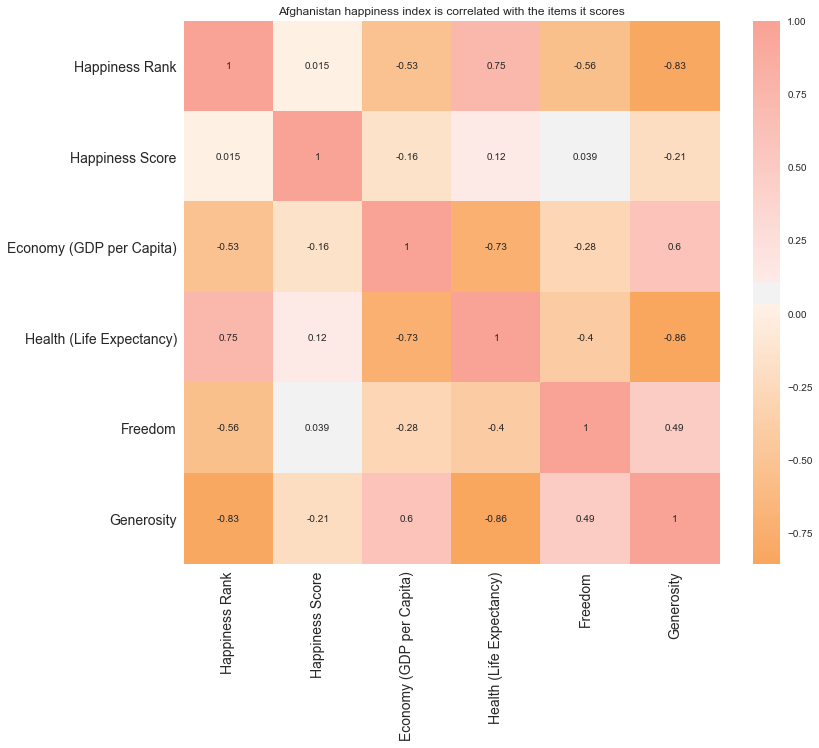

In [26]:
plt.figure(figsize=(12,10))
plt.title("Afghanistan happiness index is correlated with the items it scores")
sns.heatmap(df_HK.corr(), annot=True,linecolor='white',cmap=sns.diverging_palette(40, 20, s=88, l=75, n=200))
plt.tick_params(labelsize=14)
plt.show()

Hong Kong had more countries with a health score below 0.2 in 2020 than in 2019.
This is also very much in line with Hong Kong's current situation, in the midst of a pandemic.

In [27]:
fig = px.bar(df_HK, x='year', 
                 y='Happiness Rank',
                 color='year',
                 range_y=[70,80])
fig.update_layout(title_text="'Hong Kong's Happiness Rank'")
fig.show()

In [28]:
df_HK

year    Country        Region  Happiness Rank  Happiness Score  \
71  2015  Hong Kong  Eastern Asia              72           5.4740   
74  2016  Hong Kong  Eastern Asia              75           5.4580   
70  2017  Hong Kong           NaN              71           5.4720   
75  2018  Hong Kong  Eastern Asia              76           5.4300   
75  2019  Hong Kong  Eastern Asia              76           5.4300   
77  2020  Hong Kong           NaN              78           5.5104   

    Economy (GDP per Capita)  Health (Life Expectancy)   Freedom  Generosity  
71                  1.386040                  1.013280  0.596080    0.394780  
74                  1.510700                  0.952770  0.480790    0.400970  
70                  1.551675                  0.943062  0.490969    0.374466  
75                  1.405000                  1.030000  0.524000    0.246000  
75                  1.438000                  1.122000  0.440000    0.258000  
77                  1.376746                  1.136631  0.459357    0.134980

In [29]:
fig = px.bar(df_HK, x='year', 
                 y='Generosity',
                 color='year',
                 range_y=[0,0.4])
fig.update_layout(title_text="'Hong Kong's Generosity'")
fig.show()

Looking at Hong Kong's rankings and the generosity index, as well as the hot charts, we can see that Hong Kong's happiness ranking is closely related to generosity. For example, Hong Kong ranked 72nd in 2015, with a generosity index equal to 0.4. In 2020, it ranked 78th, with a generosity index of around 0.14. Then from 2019 to 2020, we can also see that Hong Kong's ranking has been lowered, which we suspect has something to do with the economic and health consequences of the epidemic. So let's make a heat map. The chart shows that health and economy are indeed negatively correlated with the ranking, which is in line with the current situation of Hong Kong.

## No results, just fun.
+ Here are some of the attempts

In [30]:
def get_attr(ls,pd_temp):
    df_con=pd.DataFrame({'year':[],'value':[],'type':[],'agg':[]})
    df_agg={}
    for i in ls:
        f1=pd_temp.groupby(by = 'year',as_index=False)[i].mean().rename({i: 'mean'}, axis=1)
        f2=pd_temp.groupby(by = 'year',as_index=False)[i].median().rename({i: 'median'}, axis=1)
        #f3=df_all.groupby(by = 'year',as_index=False)[i].sum().rename({i: 'sum'}, axis=1)
        f4=pd_temp.groupby(by = 'year',as_index=False)[i].min().rename({i: 'min'}, axis=1)
        f5=pd_temp.groupby(by = 'year',as_index=False)[i].max().rename({i: 'max'}, axis=1)
        df_agg[i] = reduce(lambda left,right: pd.merge(left,right,on='year',how='left'), [f1,f2,f4,f5])
    for index,key in enumerate(df_agg):
        new_all=pd.DataFrame()
        new=pd.DataFrame(df_agg[key])
        col_ls=new.columns.values
        ls=[key for i in range(len(new))]
        for j in range(1,len(col_ls)):
            ls2=[col_ls[j] for i in range(len(new))]
            new2=pd.DataFrame({'type':ls,'agg':ls2})
            test=new.loc[:,['year',col_ls[j]]]
            test.columns = ['year','value']
            res= pd.concat([test,new2], axis=1)
            df_con=df_con.append(res,ignore_index=True)
    return df_con

In [31]:
data_list=get_attr(['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity'],df_all)
fig=px.line(data_list, 
        x="year",
        y="value", 
        color="agg", 
        animation_frame="type",
        animation_group="year",
        line_group="agg",
        line_shape="spline",
        #render_mode="svg"
       )
fig.show()

In [32]:
df_2020.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                  1.000000        -0.985263   
Happiness Score                -0.985263         1.000000   
Economy (GDP per Capita)       -0.777302         0.775374   
Health (Life Expectancy)       -0.769746         0.770316   
Freedom                        -0.583441         0.590597   
Generosity                     -0.044922         0.069043   

                          Economy (GDP per Capita)  Health (Life Expectancy)  \
Happiness Rank                           -0.777302                 -0.769746   
Happiness Score                           0.775374                  0.770316   
Economy (GDP per Capita)                  1.000000                  0.848469   
Health (Life Expectancy)                  0.848469                  1.000000   
Freedom                                   0.419019                  0.448846   
Generosity                               -0.118399                 -0.071852   

                           Freedom  Generosity  
Happiness Rank           -0.583441   -0.044922  
Happiness Score           0.590597    0.069043  
Economy (GDP per Capita)  0.419019   -0.118399  
Health (Life Expectancy)  0.448846   -0.071852  
Freedom                   1.000000    0.253721  
Generosity                0.253721    1.000000

In [33]:
px.scatter_matrix(df_all, dimensions=["Happiness Score", "Economy (GDP per Capita)", 
                  "Health (Life Expectancy)", "Freedom","Generosity"], color="Generosity")

In [34]:
df_2019.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                  1.000000        -0.989096   
Happiness Score                -0.989096         1.000000   
Economy (GDP per Capita)       -0.801947         0.793883   
Health (Life Expectancy)       -0.787411         0.779883   
Freedom                        -0.546606         0.566742   
Generosity                     -0.047993         0.075824   

                          Economy (GDP per Capita)  Health (Life Expectancy)  \
Happiness Rank                           -0.801947                 -0.787411   
Happiness Score                           0.793883                  0.779883   
Economy (GDP per Capita)                  1.000000                  0.835462   
Health (Life Expectancy)                  0.835462                  1.000000   
Freedom                                   0.379079                  0.390395   
Generosity                               -0.079662                 -0.029511   

                           Freedom  Generosity  
Happiness Rank           -0.546606   -0.047993  
Happiness Score           0.566742    0.075824  
Economy (GDP per Capita)  0.379079   -0.079662  
Health (Life Expectancy)  0.390395   -0.029511  
Freedom                   1.000000    0.269742  
Generosity                0.269742    1.000000

In [35]:
feature_cols_19 = df_2019[['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]
feature_cols_20 = df_2020[['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity']]

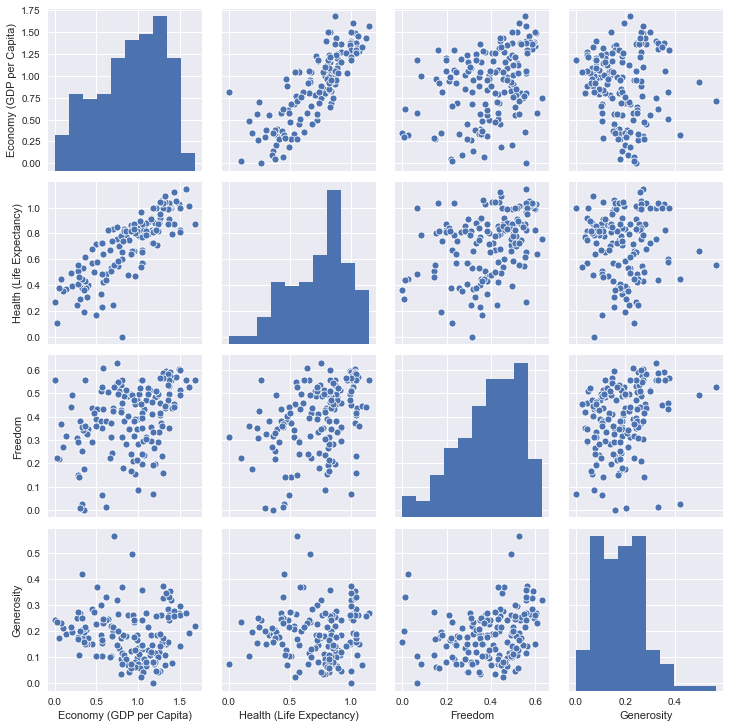

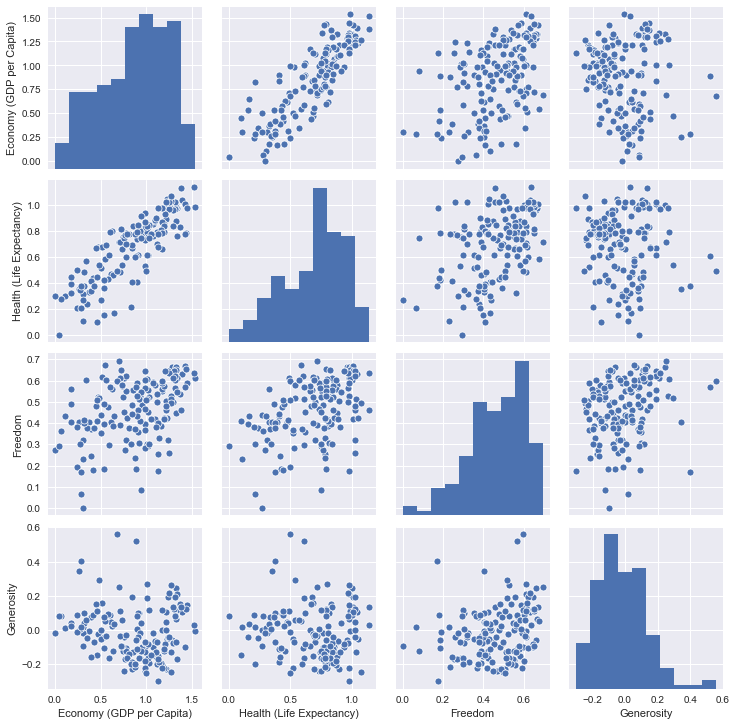

In [36]:
pairplot = sns.pairplot(feature_cols_19)
pairplot = sns.pairplot(feature_cols_20)

In [37]:
df = px.data.medals_wide(indexed=True)
fig = px.imshow(df_2019.corr())
fig.show()

In [38]:
fig = px.scatter_3d(df_all, 
                x='Economy (GDP per Capita)',
                y='Health (Life Expectancy)', 
                z='Freedom',
                animation_frame="year",
                color='Happiness Score' )
fig.show()